# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
num_mice = len(combined_data['Mouse ID'].value_counts())
num_mice

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data.loc[(combined_data.duplicated(['Timepoint','Mouse ID']) == True),:]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.loc[combined_data['Mouse ID'] != 'g989',:]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
len(clean_data['Mouse ID'].value_counts())

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
size_mean = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
size_median = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
size_var = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
size_std = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
size_sem = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

size_summary = pd.DataFrame({'Mean Size':size_mean,
                             'Median':size_median,
                             'Variance':size_var,
                             'Standard Deviation':size_std,
                             'SEM':size_sem})
size_summary

,Mean Size,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
size_summary2 = clean_data[['Drug Regimen','Tumor Volume (mm3)']].agg(['mean','median','var','std','sem'])
size_summary2

C:\Users\Nick's\AppData\Local\Temp\ipykernel_35088\2606213931.py:5: FutureWarning: ['Drug Regimen'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  size_summary2 = clean_data[['Drug Regimen','Tumor Volume (mm3)']].agg(['mean','median','var','std','sem'])


,Tumor Volume (mm3)
mean,50.435293
median,48.933454
var,79.462907
std,8.914197
sem,0.205591


## Bar and Pie Charts

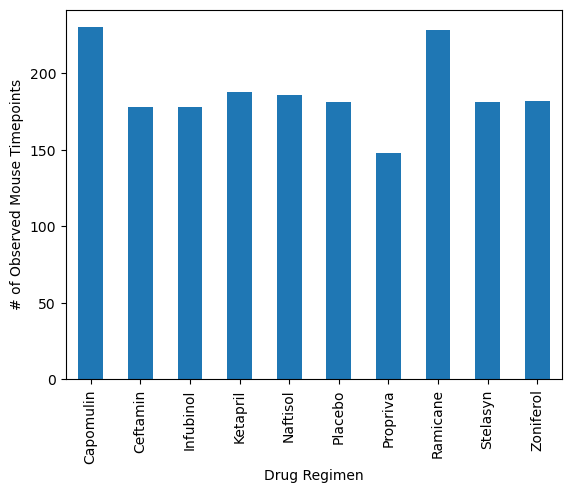

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bardf = pd.Series(clean_data.groupby(['Drug Regimen'])['Mouse ID'].count())

bardf.plot(kind='bar')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

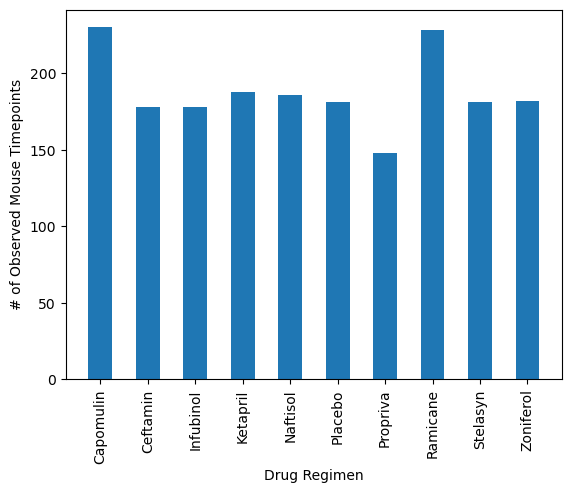

In [52]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
xaxis = range(0,len(combined_data['Drug Regimen'].value_counts()))
xticks = sorted(list(combined_data['Drug Regimen'].unique()))
yaxis = clean_data.groupby(['Drug Regimen'])['Mouse ID'].count()
plt.bar(xaxis,yaxis,width=0.5)
plt.xticks(xaxis,xticks)
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

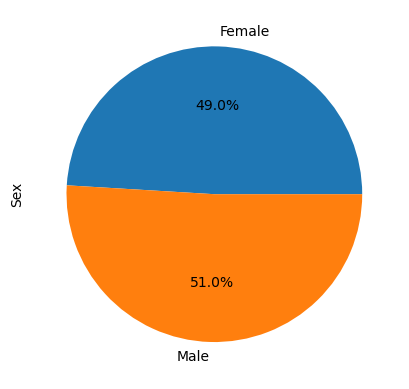

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
piedf = pd.Series(clean_data.groupby(['Sex'])['Mouse ID'].count())
piedf.plot(kind='pie',autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

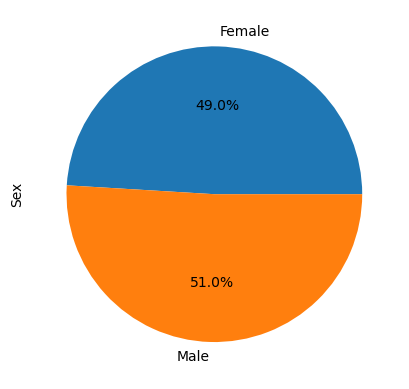

In [56]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = sorted(clean_data['Sex'].unique())
values = pd.Series(clean_data.groupby(['Sex'])['Mouse ID'].count())
plt.pie(values,labels=labels,autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [82]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
finaltp = clean_data.groupby('Mouse ID')['Timepoint'].max()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
combined_data2 = pd.merge(finaltp,clean_data, how="left", on=["Mouse ID", "Timepoint"])
combined_data2 = combined_data2.loc[(combined_data2['Drug Regimen'] == 'Capomulin') | (combined_data2['Drug Regimen'] == 'Ramicane') | (combined_data2['Drug Regimen'] == 'Infubinol') | (combined_data2['Drug Regimen'] == 'Ceftamin'),:]
combined_data2

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
238,y769,45,Ceftamin,Female,6,27,68.594745,4
239,y793,45,Capomulin,Male,17,17,31.896238,2
240,y865,45,Ceftamin,Male,23,26,64.729837,3
244,z578,45,Ramicane,Male,11,16,30.638696,0


In [103]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = sorted(list(combined_data2['Drug Regimen'].unique()))

# Create empty list to fill with tumor vol data (for plotting)
volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 



    # Locate the rows which contain mice on each drug and get the tumor volumes
volume.append(combined_data2.loc[combined_data2['Drug Regimen'],'Tumor Volume (mm3)'])
    
    # add subset 

    
    # Determine outliers using upper and lower bounds
quartiles = combined_data2['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
median = quartiles[.5]
iqr = upperq - lowerq
upperbound = upperq + 1.5*iqr
lowerbound = lowerq - 1.5*iqr

combined_data2.loc[(combined_data2['Tumor Volume (mm3)'] < lowerbound) | (combined_data2['Tumor Volume (mm3)'] > upperbound),:]

KeyError: 'Ramicane'

In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
